In [555]:
#

In [556]:
#!pip install plotly --no-cache-dir

# Import libraries

In [557]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly


# Load data and explore

Data dict

| Variable | Definition | key |
| --- | --- | --- |
|survival|	Survival|	0 = No, 1 = Yes |
|pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd| 
|sex|	Sex|	
|Age|	Age in years|	
|sibsp|	# of siblings / spouses aboard the Titanic|	
|parch|	# of parents / children aboard the Titanic|	
|ticket|	Ticket number	|
|fare|	Passenger fare	|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [558]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [559]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [560]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Decide data to use for training:

**On the first try we decided to use the columns: Pclass, Age, SibSp, Parch, Fare, Sex, Embarked**

First we will handle some missing data in the columns *Age* and *Embarked*

At the Age column, the mean of the age is 29 and the thir quartile is not so high (38), so we will input the mean in the missing rows. <br>

For the Embarked column, we have almost nothing missing data, so we will analize if we should drop these rows, or create a class UNK (Unknown)

In [561]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [562]:
# Fill NaN values in 'age' column with the mean of 'age'
age_mean = int(train_df["Age"].mean())
fare_mean = train_df["Fare"].mean()
train_df['Age'] = train_df["Age"].fillna(age_mean)
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [563]:
train_df['Embarked'] = train_df["Embarked"].fillna("UNK")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [564]:
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True, dtype=int)
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=False, dtype=int)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_UNK
0,0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,0


In [565]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_UNK
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660,0.060095
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720,-0.074282
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706,0.082949,0.031303,-0.021093,-0.021999,0.074589
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941,-0.022508
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036,-0.022467
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603,0.045646
Sex_male,-0.543351,0.131900,0.082949,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722,-0.064296
Embarked_C,0.168240,-0.243292,0.031303,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359,-0.022864
Embarked_Q,0.003650,0.221009,-0.021093,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624,-0.014588
Embarked_S,-0.155660,0.081720,-0.021999,0.070941,0.063036,-0.166603,0.125722,-0.778359,-0.496624,1.000000,-0.076588


In [566]:
scaler = StandardScaler()

X = train_df.drop(['Survived'] ,axis=1)
X = scaler.fit_transform(X)
Y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.15, random_state=3333) #42

model = RandomForestClassifier(n_estimators=1000, verbose=1)
#model = ExtraTreesClassifier(n_estimators=1000, verbose=1)
#model = GradientBoostingClassifier(n_estimators=1000, verbose=1)
#model = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=2000, solver='sgd', learning_rate='adaptive', verbose=True)
model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    4.4s


RandomForestClassifier(n_estimators=1000, verbose=1)

In [567]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
prec = precision_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
f1_s = f1_score(y_true=y_test, y_pred=y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1: {f1_s}')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


Accuracy: 0.8582089552238806
Precision: 0.9166666666666666
Recall: 0.7457627118644068
F1: 0.822429906542056


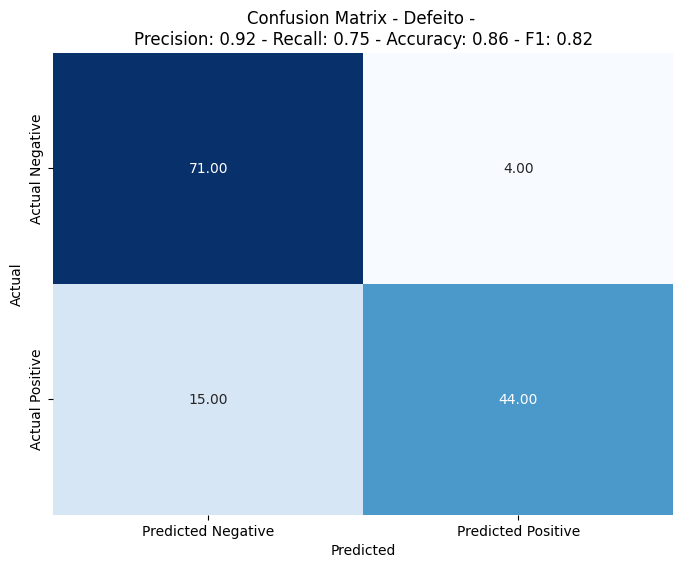

In [568]:
#thresh = 0.15

true = list(y_test)
pred = list(y_pred)

#del(confusion)

confusion = confusion_matrix(y_true = true, y_pred = pred) #normalize='all')
# Normalize the confusion matrix
#confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]


precision = precision_score(true, pred)
recall = recall_score(true, pred)
accuracy = accuracy_score(true, pred) 
f1 = f1_score(true, pred)


#print(f"Precision: {precision:.2f}")
#print(f"Recall: {recall:.2f}")
#for i in range(3):
# Plot confusion matrix as a heatmap


plt.figure(figsize=(8, 6))
#plt.subplot()

sns.heatmap(confusion, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
'''
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive']) 
'''
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Defeito - \nPrecision: {precision:.2f} - Recall: {recall:.2f} - Accuracy: {accuracy:.2f} - F1: {f1:.2f}')
plt.show()
#plt.savefig('confusion_matrix.png')

# Test model

In [569]:
test_df = pd.read_csv('test.csv')

results_df = test_df[["PassengerId"]]

test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

test_df['Embarked_UNK'] = 0 

test_df['Age'] = test_df["Age"].fillna(age_mean)
test_df['Fare'] = test_df["Fare"].fillna(fare_mean)
test_df['Embarked'] = test_df["Embarked"].fillna("UNK")

test_df = pd.get_dummies(test_df, columns=['Sex'], drop_first=True, dtype=int)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=False, dtype=int)

cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_UNK']
#Pclass	Age	SibSp	Parch	Fare	Sex_male	Embarked_C	Embarked_Q	Embarked_S	Embarked_UNK
test_df = test_df[cols]

test_df.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_UNK
0,3,34.5,0,0,7.8292,1,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,0,1,0


In [570]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_male      418 non-null    int32  
 6   Embarked_C    418 non-null    int32  
 7   Embarked_Q    418 non-null    int32  
 8   Embarked_S    418 non-null    int32  
 9   Embarked_UNK  418 non-null    int64  
dtypes: float64(2), int32(4), int64(4)
memory usage: 26.2 KB


In [571]:
y_result = model.predict(test_df)

results_df['Survived'] = y_result

results_df.head(20)

c:\Users\luan.brito\OneDrive - Kumulus\Documents\00. Study\DataScience_Class_Notes\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
